# Task 2b (1p): Generate at least 3 random graphs and provide the limited EDA (similar to previous one) for them.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

# Erdős-Rényi random graph

In [6]:
G = nx.gnp_random_graph(100, 0.5, seed=42)

<!-- Task 1 (2p.): Provide a similar analysis (EDA) for two additional networks as presented in the tutorial
(Facebook dataset and networx library).
The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank) -->

## Visualizing the network

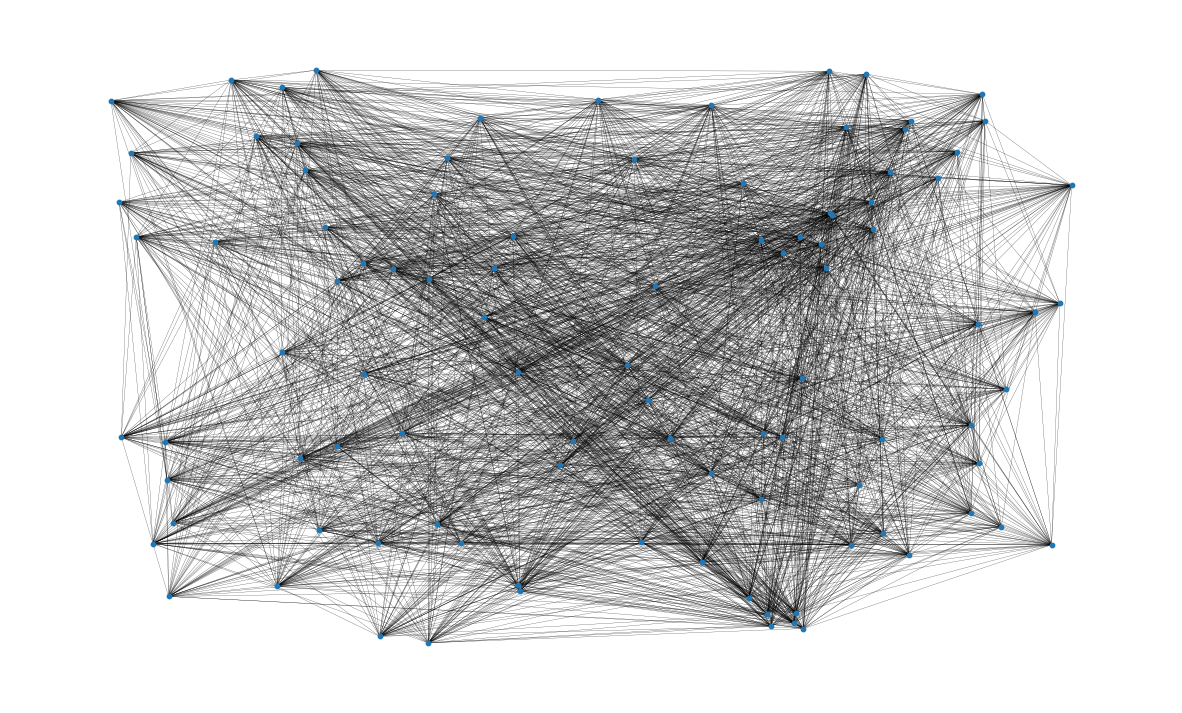

In [8]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

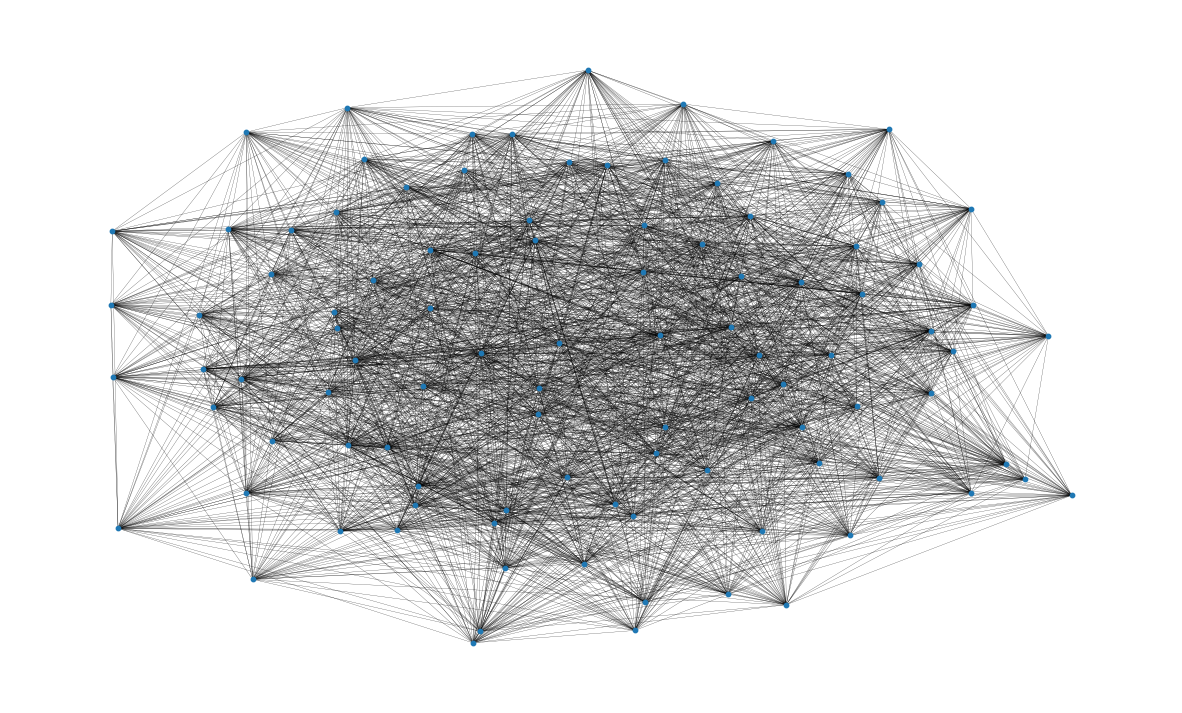

In [9]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

## Basic statistics

In [10]:
G.number_of_nodes()

100

In [11]:
G.number_of_edges()

2449

In [12]:
degrees = [d for _, d in G.degree()]

### degree distribution

In [13]:
print(f"""
Mean degree: {np.mean(degrees)}
Median degree: {np.median(degrees)}
Max degree: {np.max(degrees)}
Min degree: {np.min(degrees)}
""")


Mean degree: 48.98
Median degree: 49.0
Max degree: 61
Min degree: 35



## Shortest-paths analysis

In [14]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths[0][37]

2

In [66]:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

3

In [16]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

1.4902000000000002

Text(0, 0.5, 'Frequency (%)')

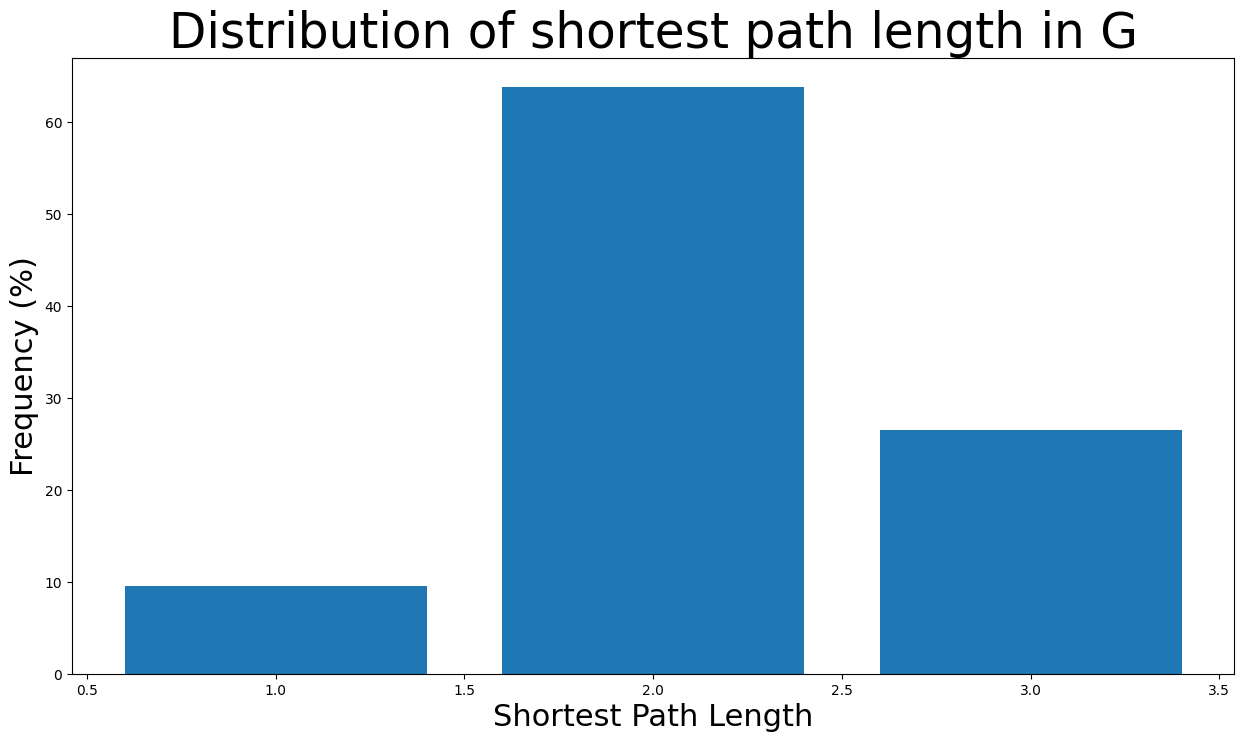

In [67]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [18]:
nx.density(G)

0.49474747474747477

In [19]:
nx.number_connected_components(G)

1

## Analysis of two or more centrality measures

### Degree Centrality

In [20]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(85, 0.6161616161616162),
 (37, 0.595959595959596),
 (79, 0.595959595959596),
 (93, 0.595959595959596),
 (95, 0.595959595959596),
 (45, 0.5858585858585859),
 (34, 0.5656565656565657),
 (42, 0.5656565656565657)]

Text(0, 0.5, 'Counts')

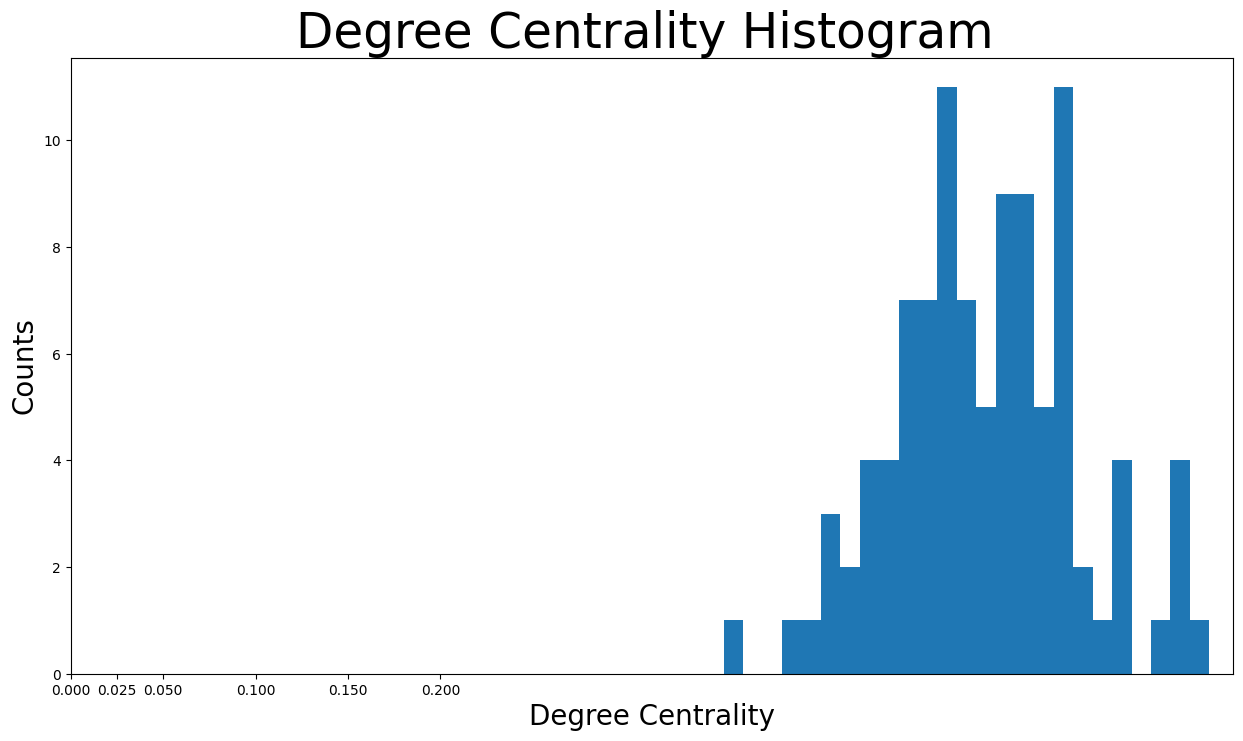

In [21]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-1.1634679087058235,
 1.2023160738802807,
 -1.2091925067702043,
 1.2015020950578659)

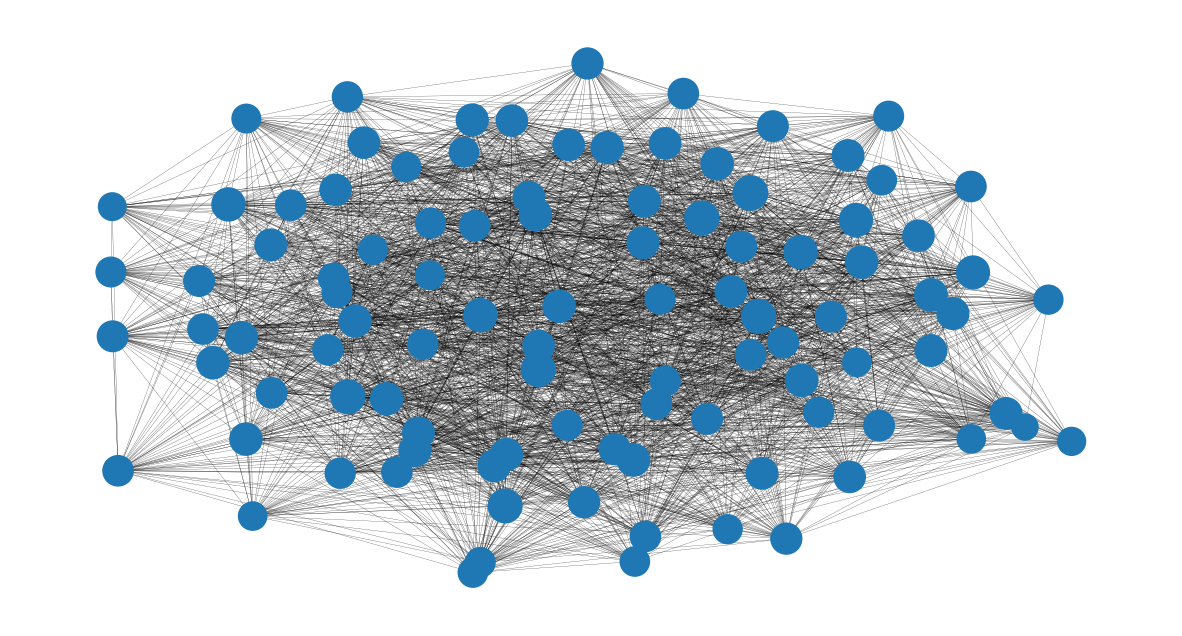

In [22]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

### Betweenness Centrality

In [23]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(85, 0.008478432696637415),
 (95, 0.007730135242536313),
 (79, 0.00753144332667342),
 (45, 0.007412126872949055),
 (37, 0.0073161562100097334),
 (93, 0.007311268750198021),
 (42, 0.006902112690254109),
 (56, 0.006820745163521003)]

Text(0, 0.5, 'Counts')

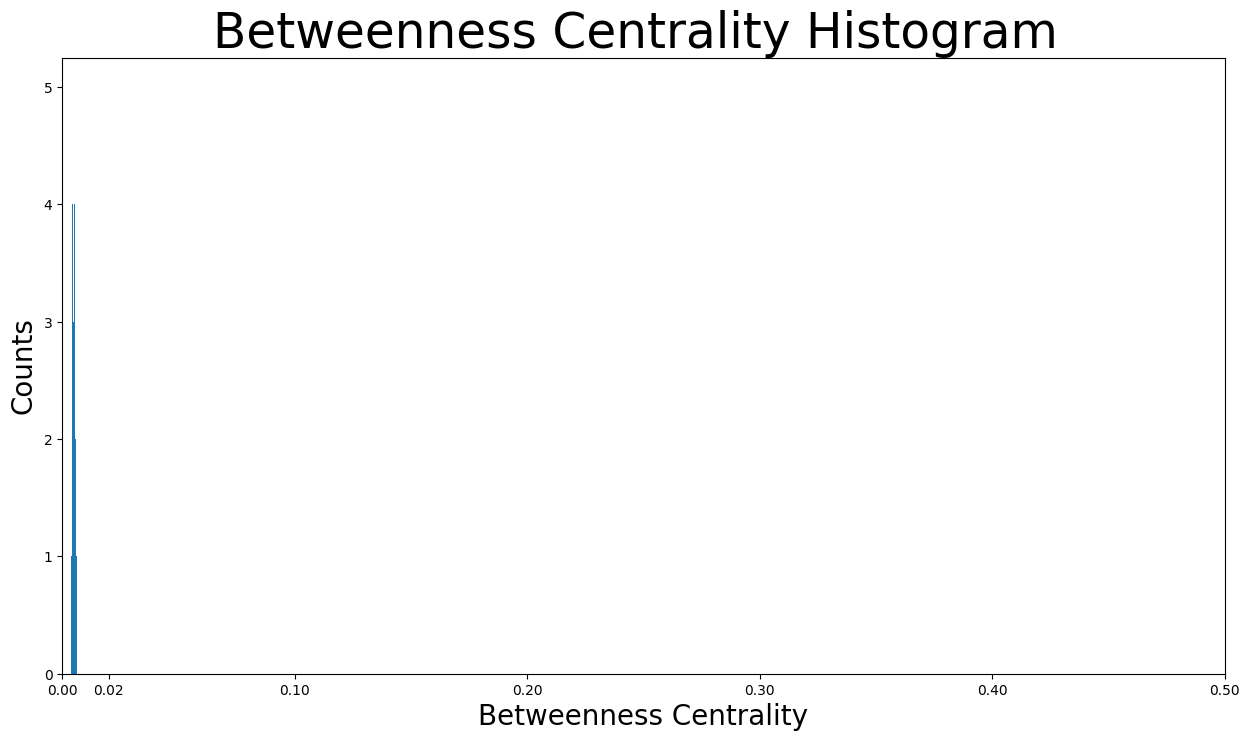

In [24]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-1.1634679087058235,
 1.2023160738802807,
 -1.2091925067702043,
 1.2015020950578659)

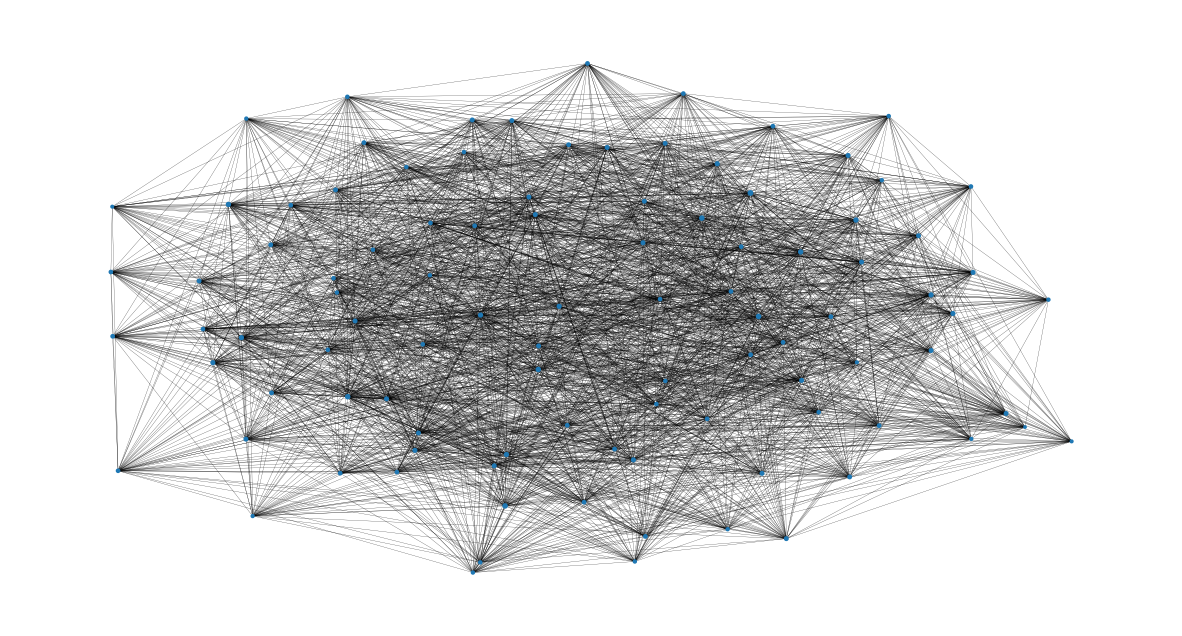

In [25]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

# Watts–Strogatz random graph

In [70]:
G = nx.newman_watts_strogatz_graph(100,5, 0.5, seed=42)

<!-- Task 1 (2p.): Provide a similar analysis (EDA) for two additional networks as presented in the tutorial
(Facebook dataset and networx library).
The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank) -->

## Visualizing the network

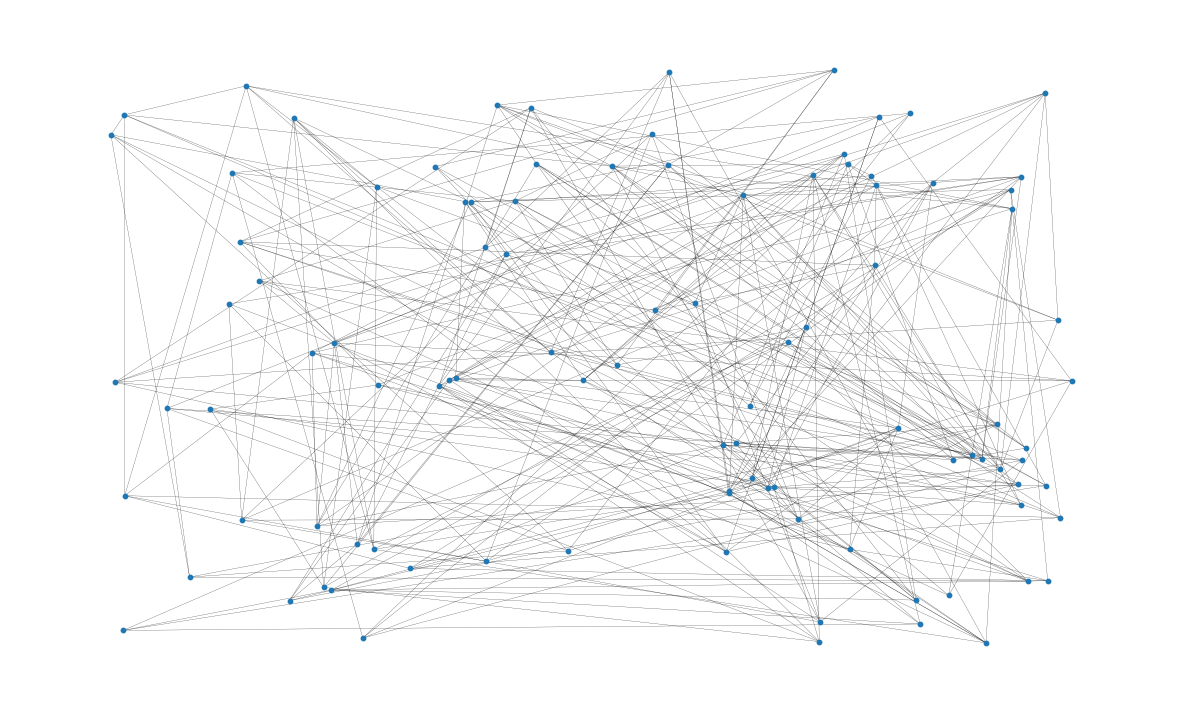

In [71]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

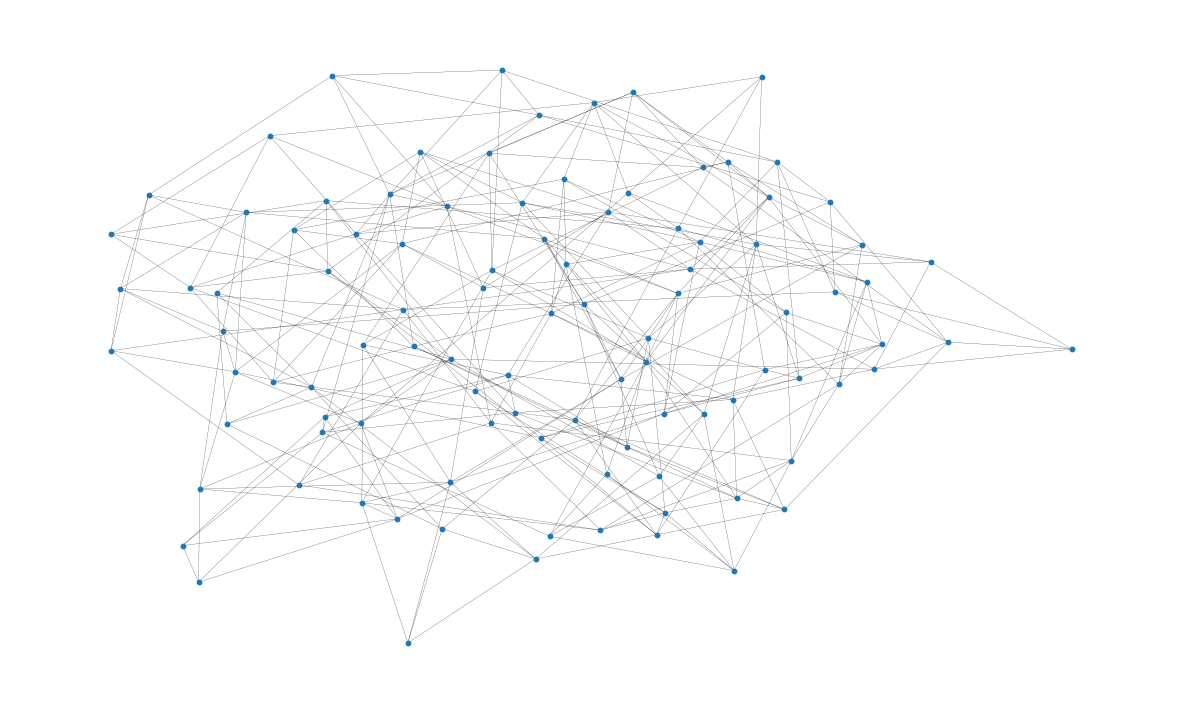

In [72]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

## Basic statistics

In [73]:
G.number_of_nodes()

100

In [74]:
G.number_of_edges()

298

In [75]:
degrees = [d for _, d in G.degree()]

### degree distribution

In [76]:
print(f"""
Mean degree: {np.mean(degrees)}
Median degree: {np.median(degrees)}
Max degree: {np.max(degrees)}
Min degree: {np.min(degrees)}
""")


Mean degree: 5.96
Median degree: 6.0
Max degree: 9
Min degree: 4



## Shortest-paths analysis

In [77]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths[0][37]

2

In [78]:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

5

In [79]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

2.903399999999999

Text(0, 0.5, 'Frequency (%)')

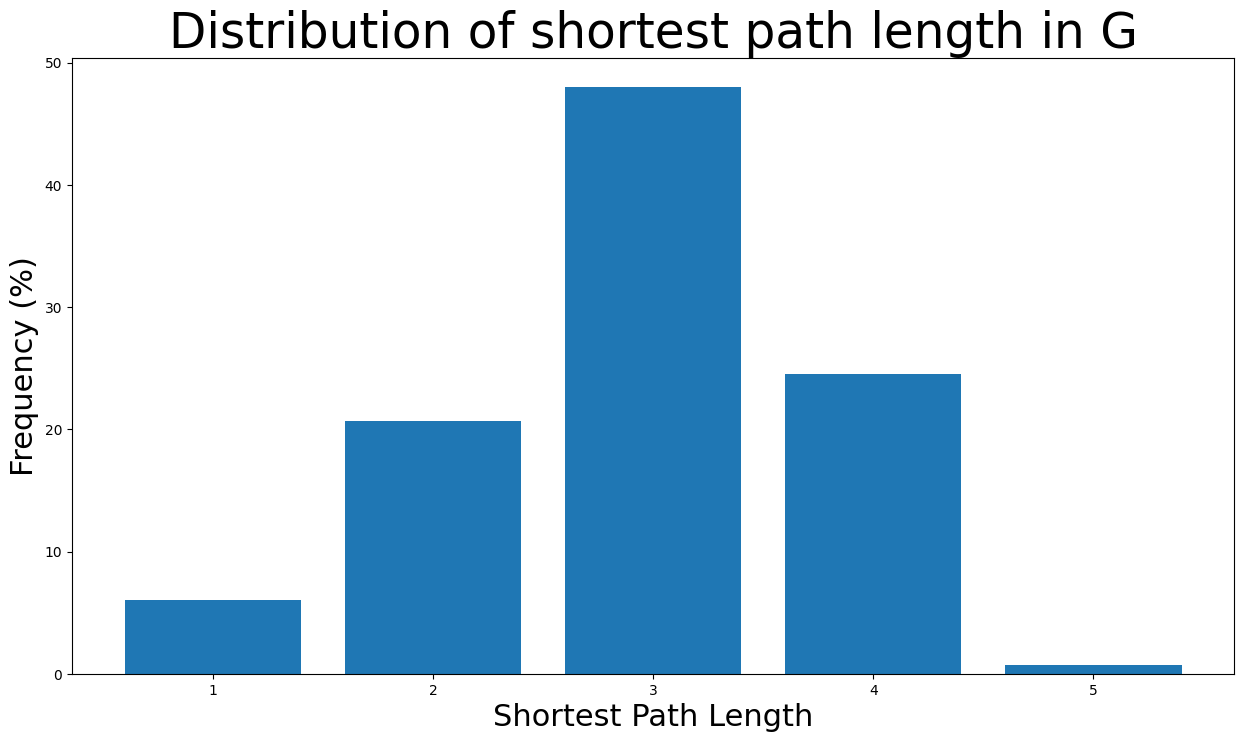

In [80]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [81]:
nx.density(G)

0.0602020202020202

In [82]:
nx.number_connected_components(G)

1

## Analysis of two or more centrality measures

### Degree Centrality

In [83]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(8, 0.09090909090909091),
 (0, 0.08080808080808081),
 (27, 0.08080808080808081),
 (58, 0.08080808080808081),
 (70, 0.08080808080808081),
 (72, 0.08080808080808081),
 (74, 0.08080808080808081),
 (83, 0.08080808080808081)]

Text(0, 0.5, 'Counts')

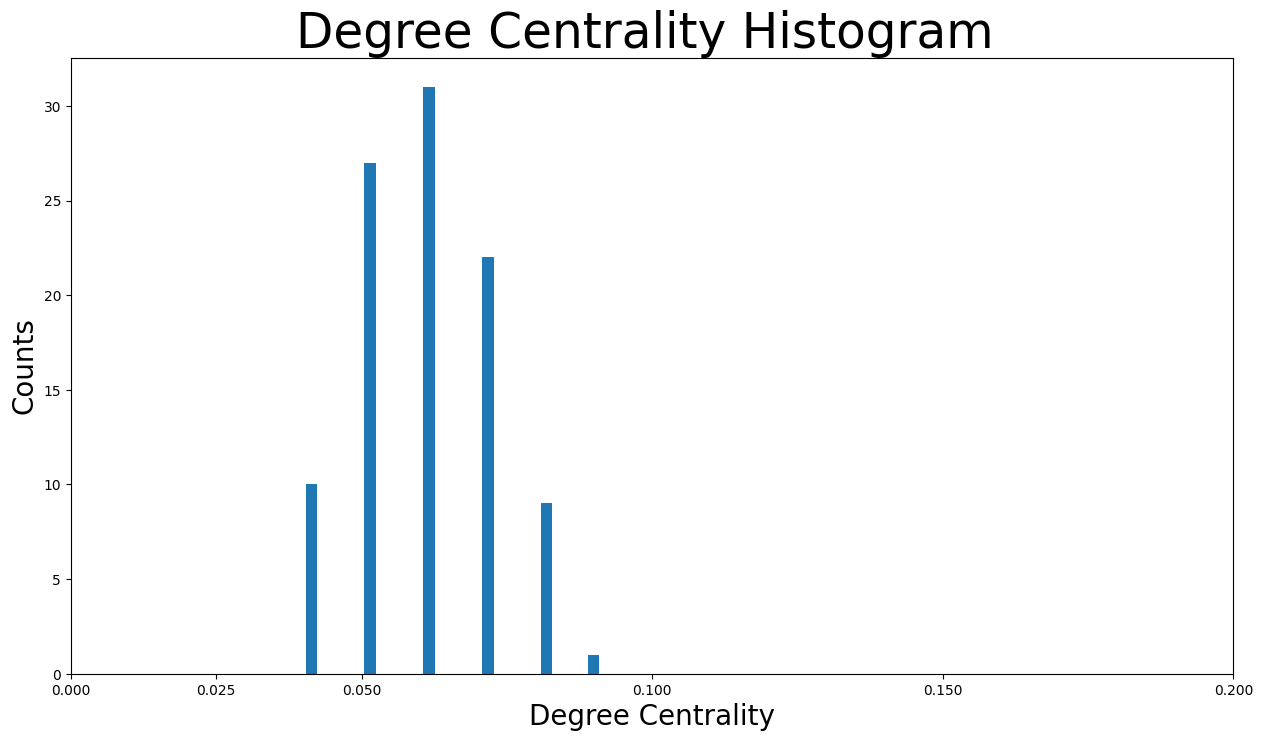

In [84]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.976511732227379,
 1.1878133320216062,
 -0.9947857873650725,
 0.8612509643907326)

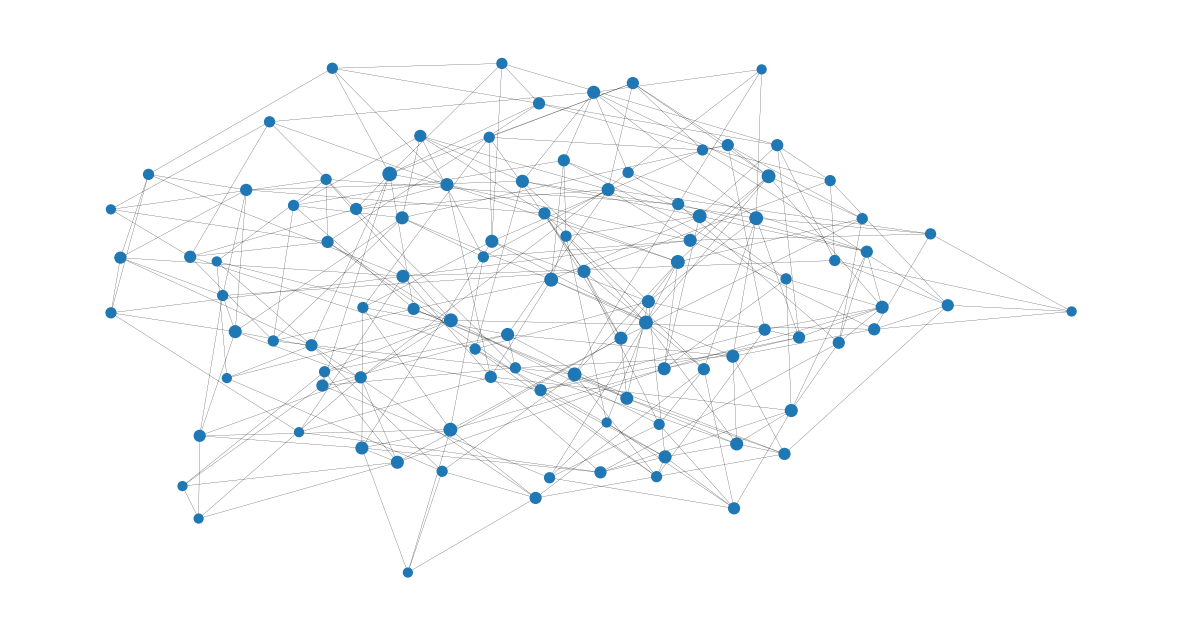

In [85]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

### Betweenness Centrality

In [86]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(8, 0.05751172869106244),
 (0, 0.055238236996442674),
 (27, 0.04374950398140891),
 (58, 0.040116275102997055),
 (41, 0.03748914976510582),
 (83, 0.03615603948306406),
 (72, 0.035274794399198894),
 (70, 0.03472934801693577)]

Text(0, 0.5, 'Counts')

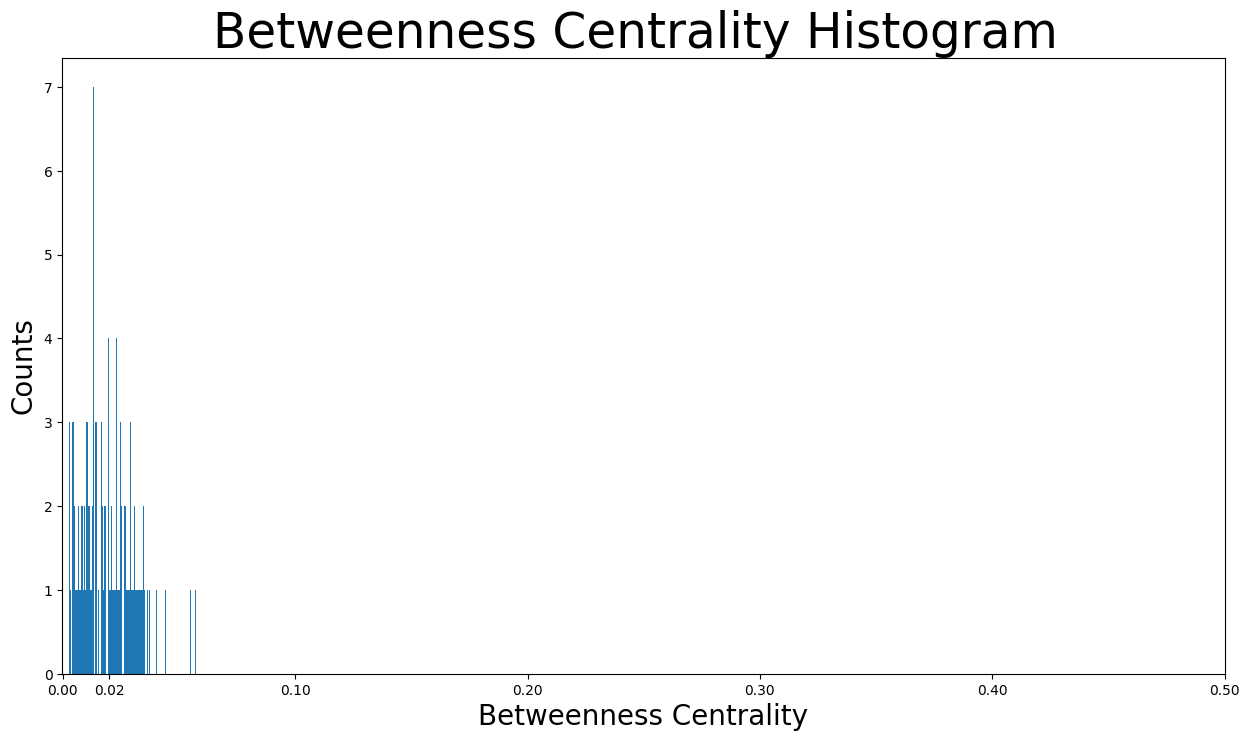

In [87]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.976511732227379,
 1.1878133320216062,
 -0.9947857873650725,
 0.8612509643907326)

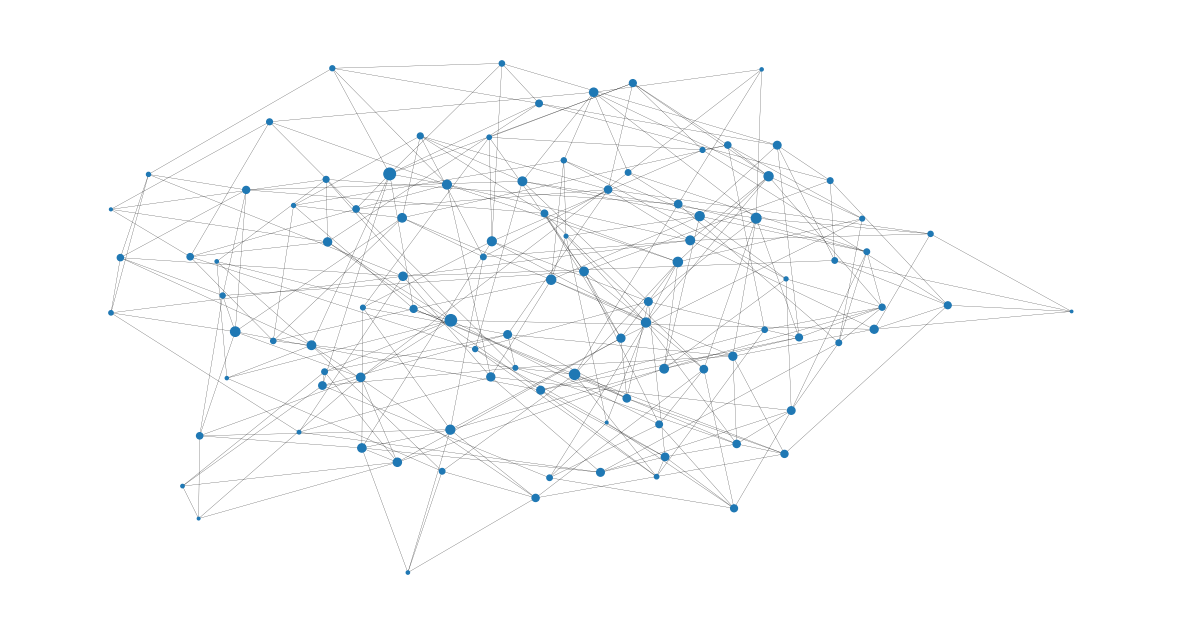

In [88]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

# Barabási–Albert random graph

In [107]:
G = nx.barabasi_albert_graph(100,5, seed=42)

<!-- Task 1 (2p.): Provide a similar analysis (EDA) for two additional networks as presented in the tutorial
(Facebook dataset and networx library).
The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank) -->

## Visualizing the network

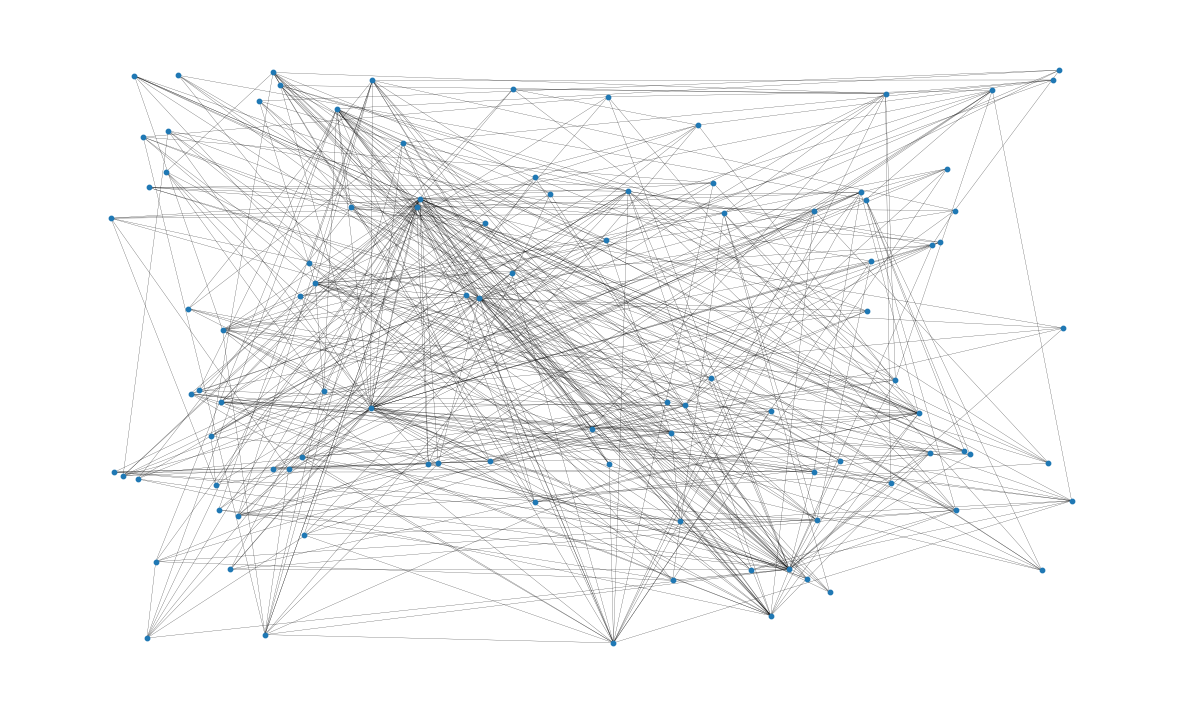

In [108]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

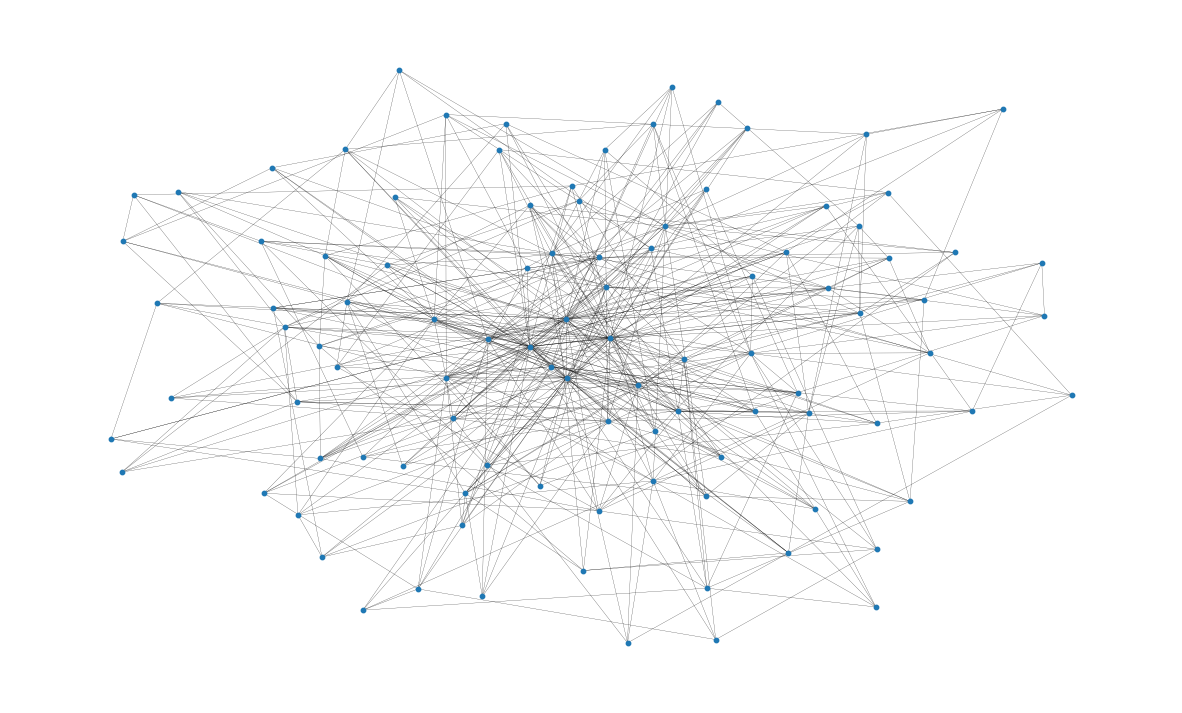

In [109]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

## Basic statistics

In [110]:
G.number_of_nodes()

100

In [111]:
G.number_of_edges()

475

In [112]:
degrees = [d for _, d in G.degree()]

### degree distribution

In [113]:
print(f"""
Mean degree: {np.mean(degrees)}
Median degree: {np.median(degrees)}
Max degree: {np.max(degrees)}
Min degree: {np.min(degrees)}
""")


Mean degree: 9.5
Median degree: 7.0
Max degree: 41
Min degree: 5



## Shortest-paths analysis

In [114]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths[0][37]

2

In [115]:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

3

In [116]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

2.1480000000000006

Text(0, 0.5, 'Frequency (%)')

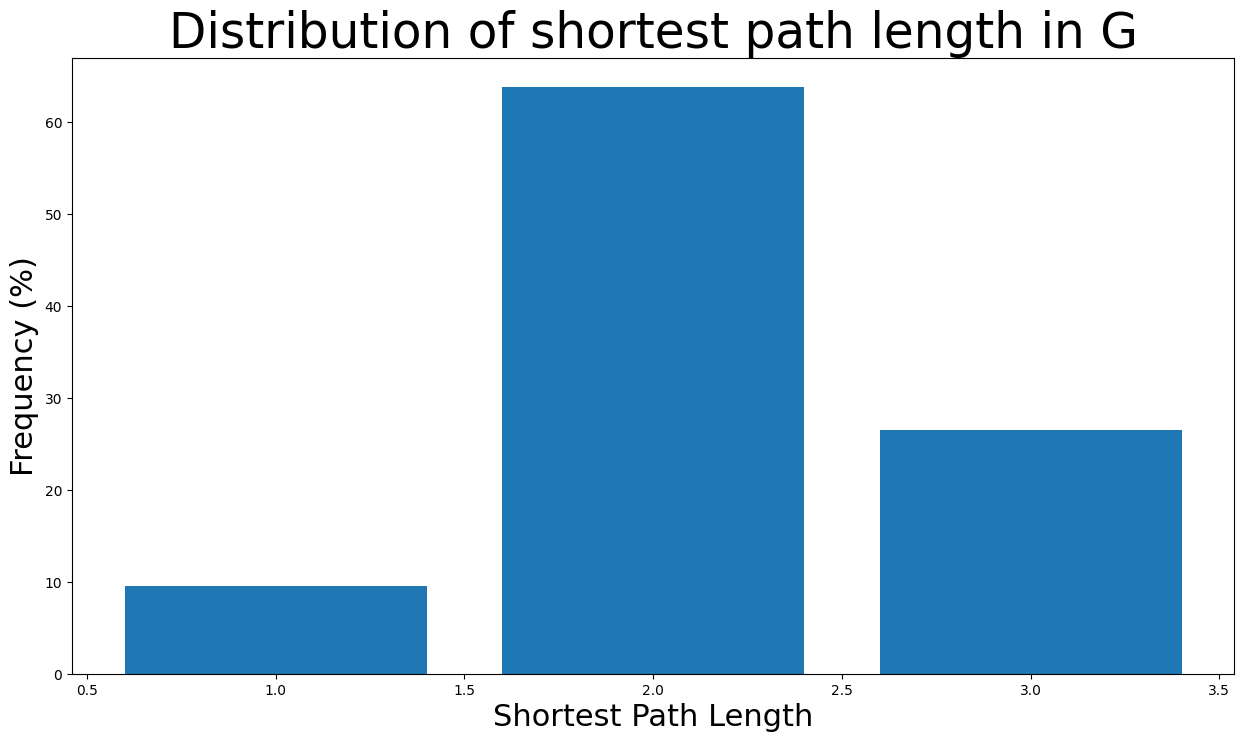

In [117]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [118]:
nx.density(G)

0.09595959595959595

In [119]:
nx.number_connected_components(G)

1

## Analysis of two or more centrality measures

### Degree Centrality

In [120]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(0, 0.4141414141414142),
 (7, 0.4141414141414142),
 (9, 0.393939393939394),
 (8, 0.37373737373737376),
 (6, 0.22222222222222224),
 (11, 0.22222222222222224),
 (19, 0.21212121212121213),
 (10, 0.20202020202020204)]

Text(0, 0.5, 'Counts')

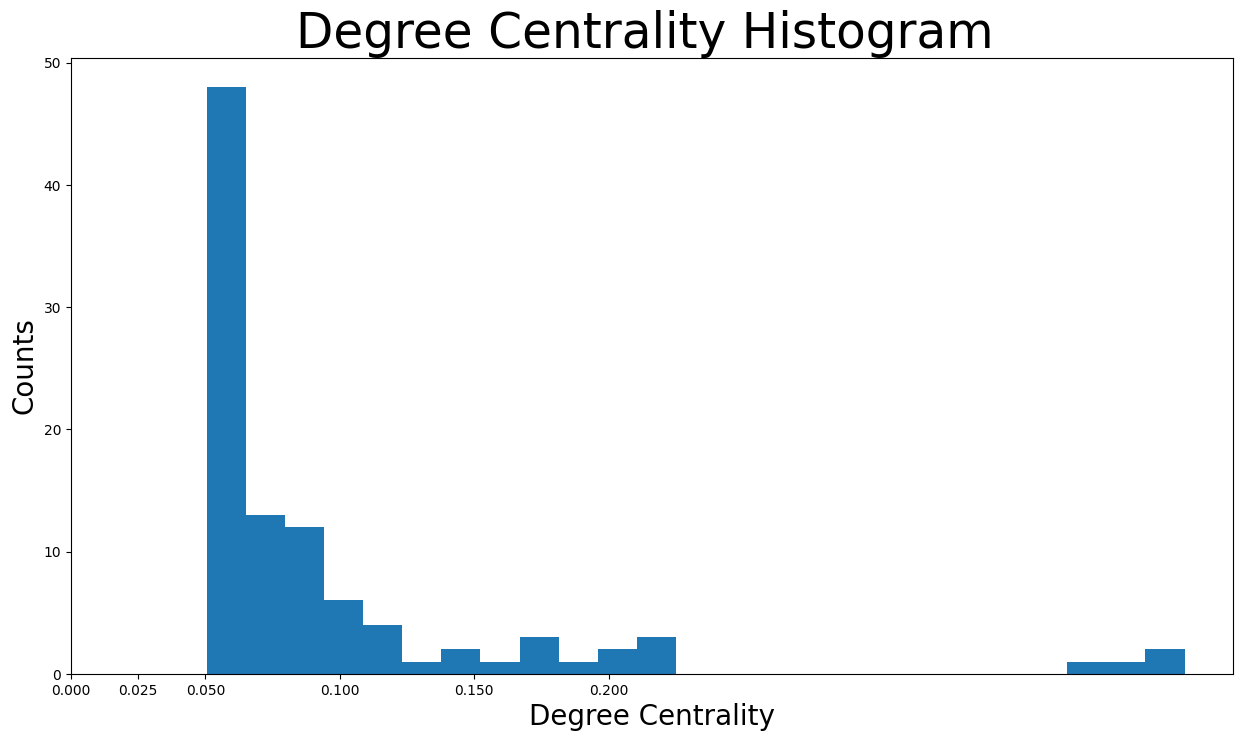

In [121]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-1.1693036923997098,
 1.2061329300470314,
 -1.139369480085056,
 1.0662509070887956)

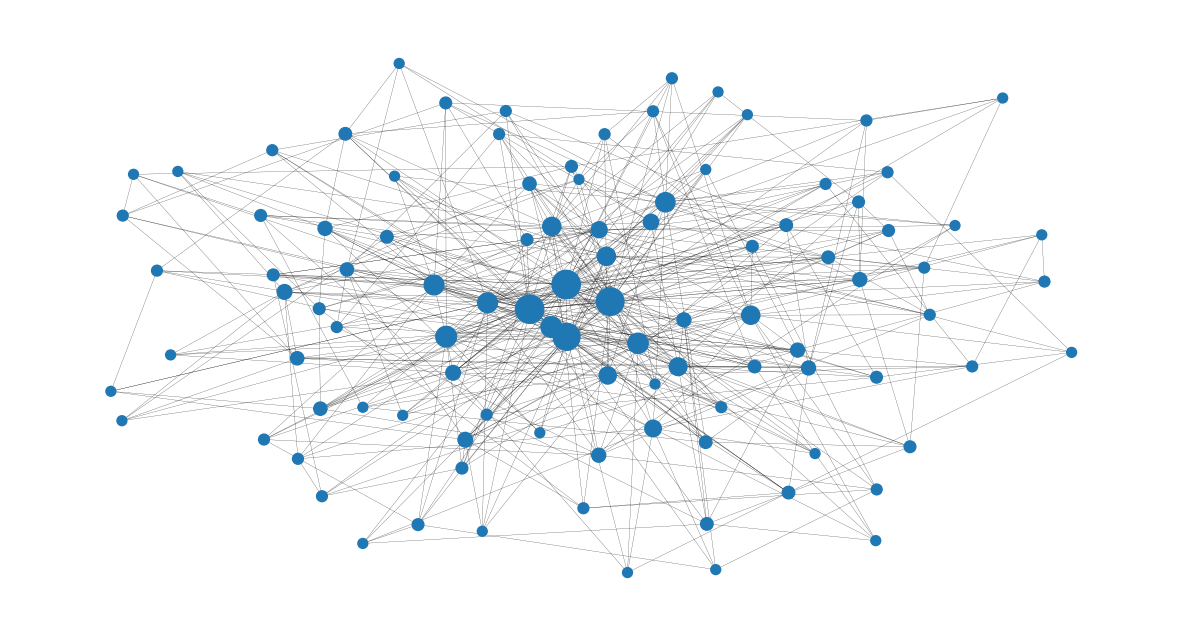

In [122]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

### Betweenness Centrality

In [123]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(7, 0.14888059735893444),
 (9, 0.13450873872894545),
 (0, 0.13068464404534957),
 (8, 0.10534491675247828),
 (19, 0.03820378814812143),
 (6, 0.03773816356974137),
 (15, 0.0372646438909768),
 (11, 0.03573850027036011)]

Text(0, 0.5, 'Counts')

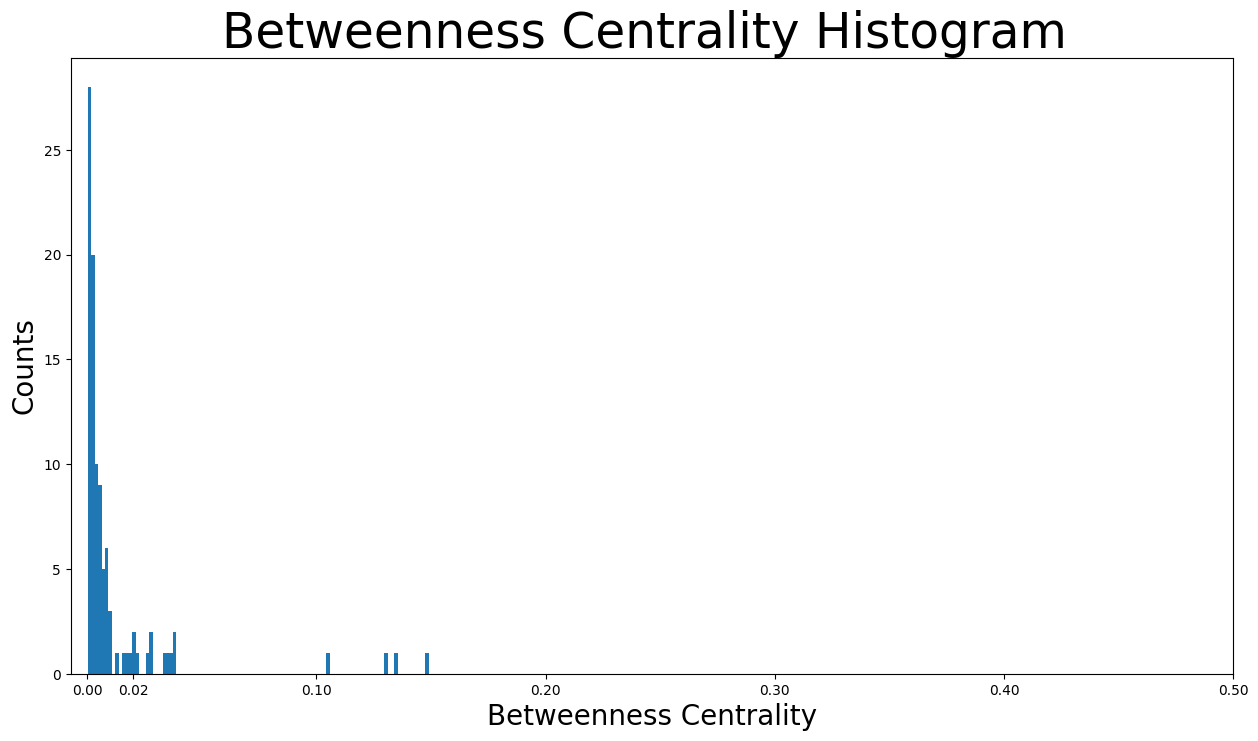

In [124]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-1.1693036923997098,
 1.2061329300470314,
 -1.139369480085056,
 1.0662509070887956)

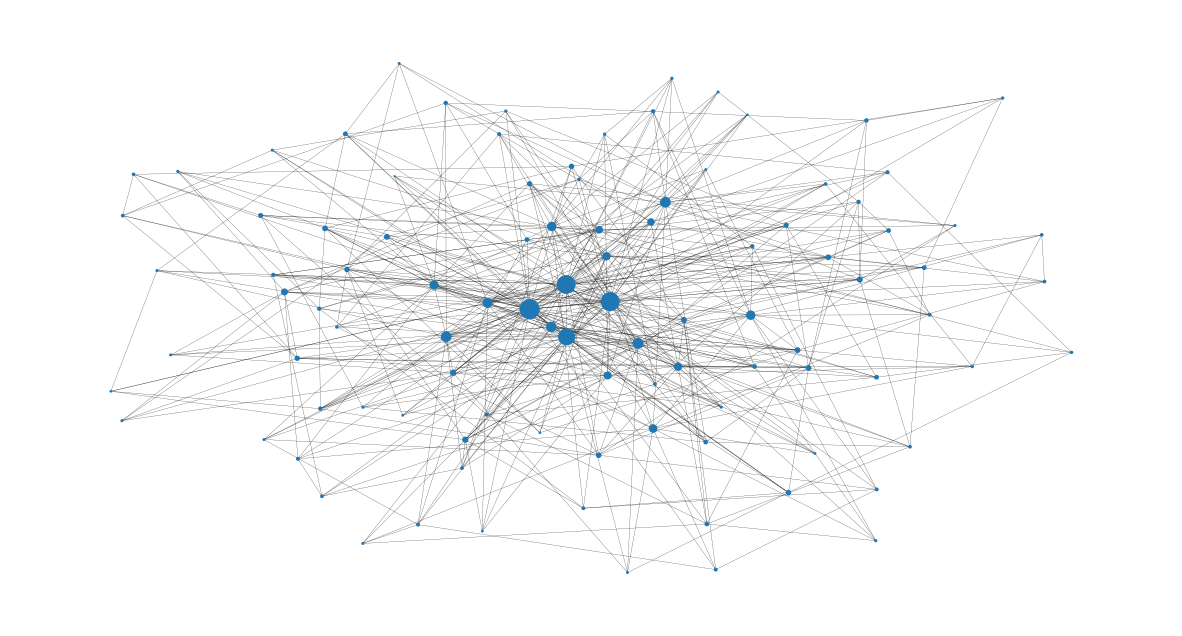

In [125]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")